In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [198]:
df.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [199]:
df['Road_Type'].unique()

array(['City Road', 'Rural Road', 'Highway', nan, 'Mountain Road'],
      dtype=object)

In [200]:
df[['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']].apply(lambda col: col.unique())

Weather                         [Rainy, Clear, Foggy, Stormy, nan, Snowy]
Road_Type               [City Road, Rural Road, Highway, nan, Mountain...
Time_of_Day                     [Morning, Night, Evening, Afternoon, nan]
Accident_Severity                              [nan, Moderate, Low, High]
Road_Condition                   [Wet, Icy, Under Construction, Dry, nan]
Vehicle_Type                           [Car, Truck, Bus, Motorcycle, nan]
Road_Light_Condition          [Artificial Light, Daylight, No Light, nan]
dtype: object

In [201]:
df.iloc[:, [0, 1, 2, 7, 8, 9, 12]] = df.iloc[:, [0, 1, 2, 7, 8, 9, 12]].apply(lambda col: pd.factorize(col)[0])

In [202]:
df.iloc[:] = df.iloc[:].replace(-1, np.nan)

/tmp/ipykernel_22050/2836064297.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:] = df.iloc[:].replace(-1, np.nan)


In [203]:
nan = df.columns[df.isna().any()]
for col in nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipykernel_22050/153313084.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipykernel_22050/153313084.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplace=True)


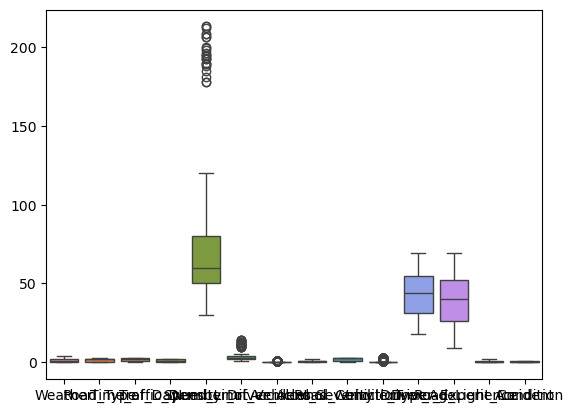

<Figure size 1200x600 with 0 Axes>

In [204]:
sns.boxplot(data=df)
plt.figure(figsize=(12, 6))
plt.show()

In [205]:
df['Speed_Limit'] = df['Speed_Limit'].clip(upper=(df['Speed_Limit'].quantile(0.95)))

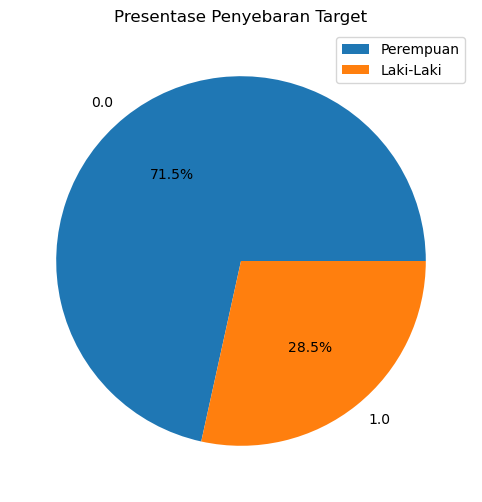

In [206]:
plt.figure(figsize=(8,6))
plt.title('Presentase Penyebaran Target')
plt.pie(df['Accident'].value_counts(), labels=df['Accident'].value_counts().index, autopct='%1.1f%%')
plt.legend(['Perempuan','Laki-Laki'])

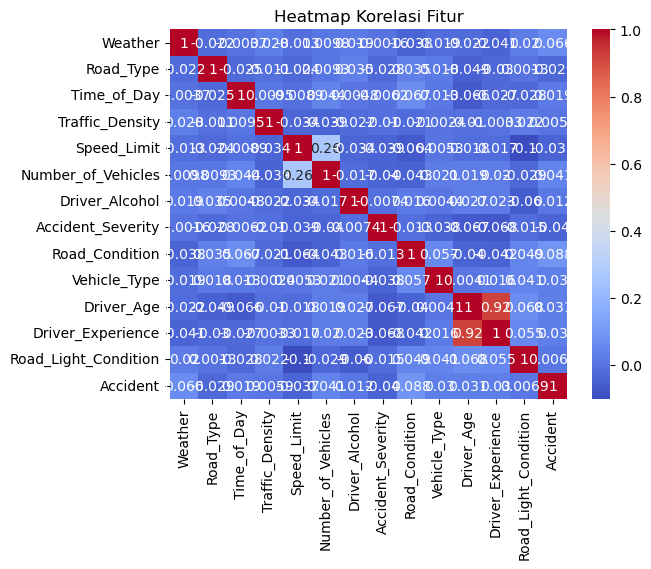

In [207]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

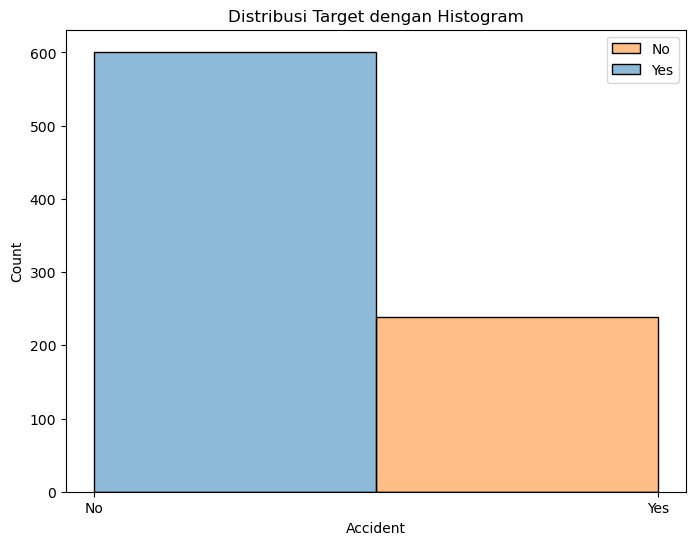

In [208]:
plt.figure(figsize=(8,6))
plt.title('Distribusi Target dengan Histogram')
sns.histplot(data=df, x='Accident', hue='Accident', bins=2)
plt.xticks([0,1], ['No', 'Yes'])
plt.legend(labels=['No', 'Yes'])
plt.show()

model

In [209]:
X = df.drop('Accident', axis=1)
y = df['Accident']

In [ ]:
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]

np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

train_0 = int(len(idx_0) * 0.8)
train_1 = int(len(idx_1) * 0.8)

train_idx = np.concatenate([idx_0[:train_0], idx_1[:train_1]])
test_idx = np.concatenate([idx_0[train_0:], idx_1[train_1:]])

X_train = X.iloc[train_idx]
X_test = X.iloc[test_idx]
y_train = y.iloc[train_idx]
y_test  = y.iloc[test_idx]

In [213]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.drop('Accident')

midpoint = {}
for col in numeric_features:

    sorteed = df[col].sort_values().unique()
    if len(sorteed) > 1:
        mids = (sorteed[:-1] + sorteed[1:]) / 2
        midpoint[col] = mids.tolist()
    else:
        midpoint[col] = []
midpoint

{'Weather': [0.5, 1.5, 2.5, 3.5],
 'Road_Type': [0.5, 1.5, 2.5],
 'Time_of_Day': [0.5, 1.5, 2.5],
 'Traffic_Density': [0.5, 1.5],
 'Speed_Limit': [40.0, 55.0, 70.0, 90.0, 110.0],
 'Number_of_Vehicles': [1.5, 2.5, 3.5, 4.5, 7.5, 10.5, 11.5, 12.5, 13.5],
 'Driver_Alcohol': [0.5],
 'Accident_Severity': [0.5, 1.5],
 'Road_Condition': [0.5, 1.5, 2.5],
 'Vehicle_Type': [0.5, 1.5, 2.5],
 'Driver_Age': [18.5,
  19.5,
  20.5,
  21.5,
  22.5,
  23.5,
  24.5,
  25.5,
  26.5,
  27.5,
  28.5,
  29.5,
  30.5,
  31.5,
  32.5,
  33.5,
  34.5,
  35.5,
  36.5,
  37.5,
  38.5,
  39.5,
  40.5,
  41.5,
  42.5,
  43.5,
  44.5,
  45.5,
  46.5,
  47.5,
  48.5,
  49.5,
  50.5,
  51.5,
  52.5,
  53.5,
  54.5,
  55.5,
  56.5,
  57.5,
  58.5,
  59.5,
  60.5,
  61.5,
  62.5,
  63.5,
  64.5,
  65.5,
  66.5,
  67.5,
  68.5],
 'Driver_Experience': [9.5,
  10.5,
  11.5,
  12.5,
  13.5,
  14.5,
  15.5,
  16.5,
  17.5,
  18.5,
  19.5,
  20.5,
  21.5,
  22.5,
  23.5,
  24.5,
  25.5,
  26.5,
  27.5,
  28.5,
  29.5,
  30.5

In [214]:
def calculate_gini(y):
    if len(y) == 0:
        return 0.0
    
    p0 = np.sum(y == 0) / len(y)
    p1 = np.sum(y == 1) / len(y)


    gini = 1.0 - (p0**2 + p1**2)
    return gini

def calculate_gini_split(g_left, g_right):

    n_total = len(g_left) + len(g_right)
    if n_total == 0:
        return 0.0
    
    gini_left = calculate_gini(g_left)
    gini_right = calculate_gini(g_right)

    weight_left = len(g_left) / n_total
    weight_right = len(g_right) / n_total

    weighted_gini = (weight_left * gini_left) + (weight_right * gini_right)
    return weighted_gini

In [ ]:
# # create a dict of DataFrames sorted by each column except the target column `col` ('Accident')
# cols_to_sort = [c for c in df.columns if c != col]

# sorted_dfs = {}
# for c in cols_to_sort:
#     sorted_dfs[c] = df.sort_values(by=c).reset_index(drop=True)

# # example: show first 5 rows of the dataframe sorted by the first column
# sorted_dfs[cols_to_sort[0]].head()

In [ ]:
# # select feature column names (all except the last 'Accident' column)
# # features = df.columns[:-1]

# feature_cols = [
#     'Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
#     'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity', 'Road_Condition',
#     'Vehicle_Type', 'Driver_Age', 'Driver_Experience', 'Road_Light_Condition'
# ]

# # sort dataframe by all feature columns and reset index
# df.sort_values(by=list(feature_cols)).reset_index(drop=True)

In [ ]:
df.head(50)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,0.0,0.0,0.0,1.0,100.0,5.0,0.0,1.0,0.0,0.0,51.0,48.0,0.0,0.0
1,1.0,1.0,1.0,1.0,120.0,3.0,0.0,0.0,0.0,1.0,49.0,43.0,0.0,0.0
2,0.0,2.0,2.0,1.0,60.0,4.0,0.0,1.0,1.0,0.0,54.0,52.0,0.0,0.0
3,1.0,0.0,3.0,2.0,60.0,3.0,0.0,1.0,2.0,2.0,34.0,31.0,1.0,0.0
4,0.0,2.0,0.0,1.0,120.0,11.0,0.0,1.0,3.0,0.0,62.0,55.0,0.0,1.0
5,1.0,1.0,1.0,0.0,120.0,3.0,0.0,0.0,3.0,1.0,49.0,43.0,0.0,0.0
6,2.0,2.0,3.0,0.0,60.0,4.0,0.0,1.0,3.0,1.0,27.0,26.0,1.0,1.0
7,0.0,0.0,3.0,0.0,60.0,4.0,0.0,1.0,3.0,0.0,29.0,22.0,0.0,1.0
8,3.0,2.0,0.0,1.0,60.0,2.0,0.0,2.0,1.0,0.0,38.0,29.0,0.0,0.0
9,0.0,0.0,3.0,2.0,30.0,2.0,0.0,1.0,3.0,1.0,50.0,48.0,0.0,0.0


In [ ]:
from matplotlib import patches

# Decision Tree visualization (custom, no sklearn)
# Uses existing variables: df, continuous_features, train_idx, find_best_threshold

def build_tree(indices, depth=0, max_depth=3, min_samples=10):
    node = {"depth": depth, "indices": np.array(indices)}
    y_node = df.loc[indices, 'Accident'].values
    # stopping criteria
    if len(indices) < min_samples or depth >= max_depth or len(np.unique(y_node)) == 1:
        # leaf
        majority = 1 if np.mean(y_node) >= 0.5 else 0
        node.update({"leaf": True, "prediction": majority, "proba": float(np.mean(y_node))})
        return node

    # find best feature & threshold by delta gini on this node
    best_feat = None
    best_thresh = None
    best_gain = 0
    best_gini_after = None

    p1 = np.mean(y_node)
    p0 = 1 - p1
    gini_before = 1 - p1**2 - p0**2

    for col in continuous_features:
        X_col = df.loc[indices, col].values
        thr, g_after = find_best_threshold(X_col, y_node)
        gain = gini_before - g_after
        if thr is None:
            continue
        if gain > best_gain:
            best_gain = gain
            best_feat = col
            best_thresh = thr
            best_gini_after = g_after

    if best_feat is None or best_gain <= 1e-8:
        majority = 1 if np.mean(y_node) >= 0.5 else 0
        node.update({"leaf": True, "prediction": majority, "proba": float(np.mean(y_node))})
        return node

    # create children
    mask_left = df.loc[indices, best_feat].values < best_thresh
    left_idx = np.array(indices)[mask_left]
    right_idx = np.array(indices)[~mask_left]

    node.update({
        "leaf": False,
        "feature": best_feat,
        "threshold": float(best_thresh),
        "gain": float(best_gain),
        "gini_after": float(best_gini_after),
        "left": build_tree(left_idx, depth+1, max_depth, min_samples),
        "right": build_tree(right_idx, depth+1, max_depth, min_samples)
    })
    return node

def count_leaves(node):
    if node["leaf"]:
        return 1
    return count_leaves(node["left"]) + count_leaves(node["right"])

# assign (x,y) positions to nodes using proportional leaf counts
positions = {}
def assign_positions(node, x0=0.0, x1=1.0, y=0.0, y_step=-1.5):
    if node["leaf"]:
        x = (x0 + x1) / 2
        positions[id(node)] = (x, y)
        return
    left_leaves = count_leaves(node["left"])
    right_leaves = count_leaves(node["right"])
    total = left_leaves + right_leaves
    mid = x0 + (x1 - x0) * (left_leaves / total)
    # position for current node (center of its interval)
    x = (x0 + x1) / 2
    positions[id(node)] = (x, y)
    assign_positions(node["left"], x0, mid, y + y_step, y_step)
    assign_positions(node["right"], mid, x1, y + y_step, y_step)

def draw_tree(node, ax):
    x, y = positions[id(node)]
    # draw node box
    if node["leaf"]:
        txt = f"Leaf\npred={node['prediction']}\nproba={node['proba']:.2f}\nn={len(node['indices'])}"
        box = patches.FancyBboxPatch((x-0.06, y-0.25), 0.12, 0.5, boxstyle="round,pad=0.02",
                                     edgecolor="black", facecolor="#ffdede")
        ax.add_patch(box)
        ax.text(x, y, txt, ha="center", va="center", fontsize=8)
    else:
        txt = f"{node['feature']} < {node['threshold']:.2f}\nΔG={node['gain']:.3f}\nn={len(node['indices'])}"
        box = patches.FancyBboxPatch((x-0.12, y-0.25), 0.24, 0.5, boxstyle="round,pad=0.02",
                                     edgecolor="black", facecolor="#deffd8")
        ax.add_patch(box)
        ax.text(x, y, txt, ha="center", va="center", fontsize=8)
        # draw edges
        for child, label in [(node["left"], "L"), (node["right"], "R")]:
            cx, cy = positions[id(child)]
            ax.plot([x, cx], [y-0.25, cy+0.25], color="k")
            # optional: mark left/right
            ax.text((x+cx)/2, (y+cy)/2, label, fontsize=7, ha="center", va="center", backgroundcolor="w")

    # recurse
    if not node["leaf"]:
        draw_tree(node["left"], ax)
        draw_tree(node["right"], ax)

# Build tree on training indices
root = build_tree(train_idx, max_depth=3, min_samples=20)

# Assign positions and draw
assign_positions(root, x0=0.0, x1=1.0, y=0.0, y_step=-1.2)
fig, ax = plt.subplots(figsize=(12, 6))
draw_tree(root, ax)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(min(y for _, y in positions.values()) - 0.6, 0.6)
ax.axis("off")
plt.title("Custom Decision Tree (trained on train_idx) — no sklearn")
plt.show()

In [ ]:

feat_x = 'Speed_Limit'
feat_y = 'Traffic_Density'

# Ambil threshold
th_x = thresholds[feat_x]
th_y = thresholds[feat_y]

x_min, x_max = X_test_df[feat_x].min()-1, X_test_df[feat_x].max()+1
y_min, y_max = X_test_df[feat_y].min()-1, X_test_df[feat_y].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Prediksi majority vote (2 fitur saja)
# 1 jika >= threshold, 0 jika < threshold
pred_grid = ((xx >= th_x).astype(int) + (yy >= th_y).astype(int)) >= 1  # majority vote 2 fitur

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, pred_grid, alpha=0.3, cmap='Accent')

# Plot data asli
plt.scatter(X_test_df[feat_x][y_test_df==0], X_test_df[feat_y][y_test_df==0], color='blue', label='NO')
plt.scatter(X_test_df[feat_x][y_test_df==1], X_test_df[feat_y][y_test_df==1], color='red', label='YES')

plt.xlabel(feat_x)
plt.ylabel(feat_y)
plt.title('Decision Boundary 2 fitur')
plt.legend()
plt.show()
